# Trabajo Práctico Nº3: Redes Neuronales de Grafos

## Alumno: Matías Amestoy

## *Ejercicio 1*

En primer lugar, se importan las bibliotecas que se utilizan a lo largo del notebook del informe.

In [1]:
import os
import numpy as np
import torch; torch.set_default_dtype(torch.float64)
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import Utils.graphML as gml 
import Utils.dataTools as dataTools
import Utils.graphTools as graphTools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle

Se define el dispositivo de uso para pytorch.

In [2]:
device = 'cpu'

A partir de la documentación para la clase Authorship, se importa la información para dos autores: Poe y Austen, con la proporción de datos de entrenamiento y validación indicada.

In [3]:
authorName1 = 'austen'
authorName2 = 'poe'

ratioTrain = 0.95
ratioValid = 0.08
dataPath = os.path.join('dataset','authorshipData.mat')

Se cargan los datos para cada autor a fin de obtener los grafos no dirigidos, conectados, sin nodos aislados y normalizados por filas, tal como se pide.

In [4]:
dataAusten = dataTools.Authorship(authorName1,
                            ratioTrain,
                            ratioValid,
                            dataPath,
                            'rows', 
                            False,
                            True,
                            True)

dataPoe = dataTools.Authorship(authorName2,
                            ratioTrain,
                            ratioValid,
                            dataPath,
                            'rows',
                            False,
                            True,
                            True)

Se imprime la lista de palabras funcionales para cada autor analizado.

In [5]:
dataAusten.getFunctionWords()

(['a',
  'bit',
  'couple',
  'about',
  'above',
  'absent',
  'according',
  'accordingly',
  'across',
  'after',
  'against',
  'ahead',
  'all',
  'along',
  'although',
  'amid',
  'amidst',
  'among',
  'amongst',
  'an',
  'and',
  'another',
  'any',
  'anybody',
  'anyone',
  'anything',
  'around',
  'as',
  'aside',
  'at',
  'away',
  'bar',
  'because',
  'before',
  'behind',
  'below',
  'beneath',
  'beside',
  'besides',
  'between',
  'beyond',
  'both',
  'but',
  'by',
  'can',
  'certain',
  'close',
  'concerning',
  'consequently',
  'considering',
  'could',
  'dare',
  'down',
  'due',
  'during',
  'each',
  'either',
  'enough',
  'every',
  'everybody',
  'everyone',
  'everything',
  'except',
  'failing',
  'few',
  'fewer',
  'following',
  'for',
  'from',
  'given',
  'hence',
  'however',
  'if',
  'in',
  'spite',
  'view',
  'including',
  'inside',
  'instead',
  'into',
  'it',
  'its',
  'itself',
  'less',
  'like',
  'little',
  'many',
  'may'

In [6]:
dataPoe.getFunctionWords()

(['a',
  'bit',
  'couple',
  'about',
  'above',
  'absent',
  'according',
  'accordingly',
  'across',
  'after',
  'against',
  'ahead',
  'albeit',
  'all',
  'along',
  'alongside',
  'although',
  'amid',
  'amidst',
  'among',
  'amongst',
  'an',
  'and',
  'another',
  'any',
  'anybody',
  'anything',
  'around',
  'as',
  'aside',
  'astride',
  'at',
  'away',
  'bar',
  'because',
  'before',
  'behind',
  'below',
  'beneath',
  'beside',
  'besides',
  'between',
  'beyond',
  'both',
  'but',
  'by',
  'can',
  'certain',
  'close',
  'concerning',
  'consequently',
  'considering',
  'could',
  'dare',
  'despite',
  'down',
  'due',
  'during',
  'each',
  'either',
  'enough',
  'every',
  'everybody',
  'everything',
  'except',
  'failing',
  'few',
  'fewer',
  'following',
  'for',
  'from',
  'given',
  'heaps',
  'hence',
  'however',
  'if',
  'in',
  'spite',
  'view',
  'including',
  'inside',
  'instead',
  'into',
  'it',
  'its',
  'itself',
  'less',
 

Se halla el grado máximo para cada grafo a partir de la suma total de la suma de cada fila.

In [7]:
S1 = dataAusten.getGraph()
S2 = dataPoe.getGraph()

d1 = np.sum(np.sum(S1, axis = 1), axis = 0)
d2 = np.sum(np.sum(S2, axis = 1), axis = 0)

print('Grado máximo del grafo para Jane Austen: {}'.format(int(d1)))
print('Grado máximo del grafo para Edgar Allan Poe: {}'.format(int(d2)))

Grado máximo del grafo para Jane Austen: 189
Grado máximo del grafo para Edgar Allan Poe: 193


A continuación, se imprimen los grafos para cada uno de los autores, junto con la cantidad de señales en cada set de entrenamiento, validación y testeo. También se incluye la cantidad de estas muestras que corresponden efectivamente al autor en cuestión (un 50% del total de las señales).

Grafo Austen
Number of nodes: 189
Number of training signals: 1346
Number of validation signals: 118
Number of testing signals: 78
Number of training signals corresponding to Austen: 673
Number of validation signals corresponding to Austen: 59
Number of testing signals corresponding to Austen: 39


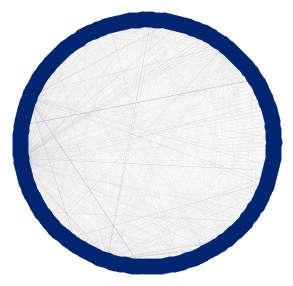

In [91]:
print('Grafo Austen')
graphTools.printGraph(S1)

# Get important information from the loaded data

S1 = dataAusten.getGraph() # Get the adjacency matrix
N1 = S1.shape[0] # Get the number of nodes
xTrain1, yTrain1 = dataAusten.getSamples('train') # Get the training samples
xValid1, yValid1 = dataAusten.getSamples('valid') # Get the validation samples
xTest1, yTest1 = dataAusten.getSamples('test') # Get the test samples
nTrain1 = xTrain1.shape[0] # Number of training samples
nValid1 = xValid1.shape[0] # Number of validation samples
nTest1 = xTest1.shape[0] # Number of testing samples

# Print some info
print("Number of nodes: %d" % N1)
print("Number of training signals: %d" % nTrain1)
print("Number of validation signals: %d" % nValid1)
print("Number of testing signals: %d" % nTest1)

# Carry out several important adaptations

# Normalize the adjacency matrix
S1 = S1/np.max(np.linalg.eigvals(S1))

# Add the extra "edge_feature" dimension to the matrix
S1 = np.expand_dims(S1, axis = 0) # 1 x N x N

# Note that the xTrain, xValid and xTest are of shape B x N, 
# but we want them to be B x F x N with F = 1 (there's only one input feature)
xTrain1 = np.expand_dims(xTrain1, axis = 1)
xValid1 = np.expand_dims(xValid1, axis = 1)
xTest1 = np.expand_dims(xTest1, axis = 1)

nTrain_aus = len(yTrain1[yTrain1 == 1])
nVal_aus = len(yValid1[yValid1 == 1])
nTest_aus = len(yTest1[yTest1 == 1])


print("Number of training signals corresponding to Austen: %d" % nTrain_aus)
print("Number of validation signals corresponding to Austen: %d" % nVal_aus)
print("Number of testing signals corresponding to Austen: %d" % nTest_aus)

Grafo Poe:
Number of nodes: 194
Number of training signals: 740
Number of validation signals: 64
Number of testing signals: 42
Number of training signals corresponding to Austen: 370
Number of validation signals corresponding to Austen: 32
Number of testing signals corresponding to Austen: 21


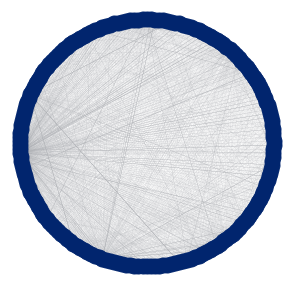

In [9]:
print('Grafo Poe:')
graphTools.printGraph(S2)

# Get important information from the loaded data

S2 = dataPoe.getGraph() # Get the adjacency matrix
N2 = S2.shape[0] # Get the number of nodes
xTrain2, yTrain2 = dataPoe.getSamples('train') # Get the training samples
xValid2, yValid2 = dataPoe.getSamples('valid') # Get the validation samples
xTest2, yTest2 = dataPoe.getSamples('test') # Get the test samples
nTrain2 = xTrain2.shape[0] # Number of training samples
nValid2 = xValid2.shape[0] # Number of validation samples
nTest2 = xTest2.shape[0] # Number of testing samples

# Print some info
print("Number of nodes: %d" % N2)
print("Number of training signals: %d" % nTrain2)
print("Number of validation signals: %d" % nValid2)
print("Number of testing signals: %d" % nTest2)

# Carry out several important adaptations

# Normalize the adjacency matrix
S2 = S2/np.max(np.linalg.eigvals(S2))

# Add the extra "edge_feature" dimension to the matrix
S2 = np.expand_dims(S2, axis = 0) # 1 x N x N

# Note that the xTrain, xValid and xTest are of shape B x N, 
# but we want them to be B x F x N with F = 1 (there's only one input feature)
xTrain2 = np.expand_dims(xTrain2, axis = 1)
xValid2 = np.expand_dims(xValid2, axis = 1)
xTest2 = np.expand_dims(xTest2, axis = 1)

nTrain_poe = len(yTrain2[yTrain2 == 1])
nVal_poe = len(yValid2[yValid2 == 1])
nTest_poe = len(yTest2[yTest2 == 1])


print("Number of training signals corresponding to Austen: %d" % nTrain_poe)
print("Number of validation signals corresponding to Austen: %d" % nVal_poe)
print("Number of testing signals corresponding to Austen: %d" % nTest_poe)

La representación de los grafos permite ver a simple vista las diferencias entre vínculos de palabras que distingue a ambos autores. Si bien muchas conexiones son similares, existen marcas específicas que permiten distinguir un autor del otro a partir del diagrama de vínculos entre nodos.

Si se representa la frecuencia media de uso de cada término funcional en un histograma apilado, según las muestras consideradas para cada autor, se puede observar también que, pese a haber obviamente muchas palabras de uso común, la estructura general de prevalencia de cada palabra es diferente.

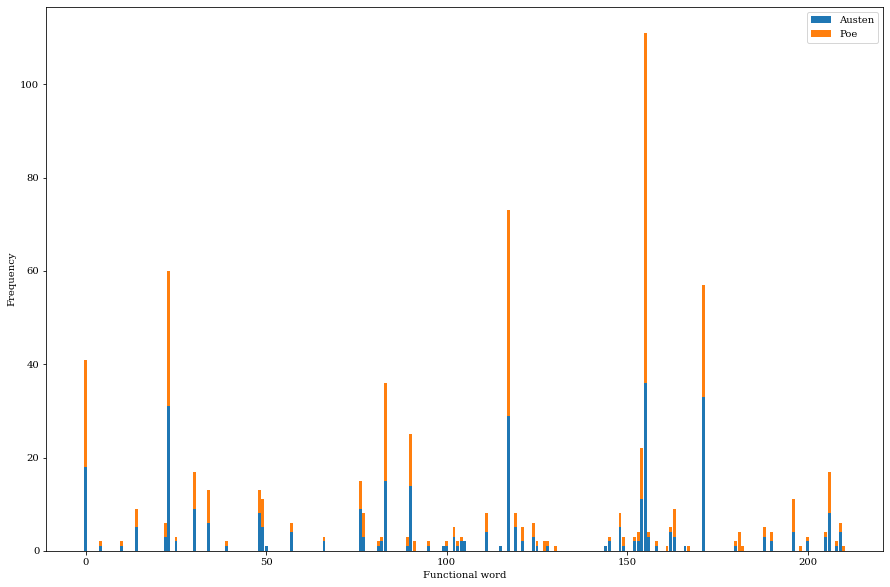

In [10]:
authorData_aus = dataAusten.getAuthorData('all', 'wordFreq', 0)
mean_freq_aus = authorData_aus.mean(axis=0).astype(int)
x = dataAusten.getFunctionWords()[0][0:len(mean_freq_aus)]
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(x=range(0,len(mean_freq_aus)), height=mean_freq_aus, label='Austen')
ax.set_ylabel('Frequency')
ax.set_xlabel('Functional word')

authorData_poe = dataPoe.getAuthorData('all', 'wordFreq', 0)
mean_freq_poe = authorData_poe.mean(axis=0).astype(int)
x = dataPoe.getFunctionWords()[0][0:len(mean_freq_aus)]
ax.bar(x=range(0,len(mean_freq_poe)), height=mean_freq_poe, bottom=mean_freq_aus, label='Poe')
ax.legend()

## *Ejercicio 2*

En primer lugar, se crea el modelo pedido que consiste en una GNN de una sola capa convolucional, con función de activación RELU y un perceptrón multicapa para la salida. Se eligió arbitrariamente el número de nodos para el output de la capa de entrada y de la capa oculta en 256 y 128.

In [11]:
class GNN1Ly(nn.Module):
    
    def __init__(self, F, K, S):
        # F: Number of features (hidden units) at the output of the first layer
        # K1: Number of K-hops to consider in the first layer
        # S: Graph matrix description
        
        # Initialize the parent
        super().__init__()
        
        self.name = 'gnn1ly'

        # First layer
        self.graphConvLy1 = gml.GraphConv(1, F, K) # The first '1' is because the input feature is 1
        self.graphConvLy1.set_graph(S) # Set the graph we're going to use
        # Nonlinear activation function
        self.activationFunction = nn.ReLU()
        
        # Readout layer
                
        self.input_fc = nn.Linear(F * S.shape[1], 256)
        self.hidden_fc = nn.Linear(256, 128)
        self.output_fc = nn.Linear(128, 2)
        #self.readoutLayer = nn.Linear(F * S.shape[1], 2)
        #    Note that at the end of the second layer we have N = S.shape[1] nodes, each one with F2 features
        #    Therefore, we want to flatten all of this into a single vector to pass it to the readout layer
        #    The output of the readout layer is the number of classes (or it could be just 1, depending on
        #    what function we're going to use to train this)
    
    def forward(self, x):
        
        # Remember the signal has shape B x Fin x N, where Fin = 1 for us
        
        # Apply the first layer
        y = self.graphConvLy1(x) # Output has shape B x F1 x N
        y = self.activationFunction(y) # Nonlinear activation
        
        
        # Flatten the output before moving to apply the readout layer
        y = y.reshape(y.shape[0], y.shape[1]*y.shape[2])
        
        # Apply the readout layer
        y = self.input_fc(y)
        y = self.activationFunction(y)
        y = self.hidden_fc(y)
        y = self.activationFunction(y)
        y = self.output_fc(y)
        
        return y

Se definen algunas funciones útiles para el entrenamiento y testeo de los modelos. Primero, una función de reseteo de los parámetros de los modelos, otra función para el cálculo del error de validación y una para grabar y cargar checkpoints con los parámetros óptimos que se obtengan durante el entrenamiento.

In [12]:
def model_reset(model):
    
    for layer in model.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

In [13]:
def validate(model, xval, yval):
    model.eval()

    with torch.no_grad():
        yHatval = model(xval)

    return lossFunction(yHatval, yval).item()


In [14]:
def save_checkpoint(save_path, model, optimizer, valid_loss):

    if save_path == None:
        return
    
    state_dict = {'model_state_dict': model.state_dict(),
                  'optimizer_state_dict': optimizer.state_dict(),
                  'valid_loss': valid_loss}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')


def load_checkpoint(load_path, model, optimizer):

    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    model.load_state_dict(state_dict['model_state_dict'])
    optimizer.load_state_dict(state_dict['optimizer_state_dict'])
    
    return state_dict['valid_loss']

Se define la función de entrenamiento para los modelos, que toma como parámetros la cantidad de épocas de entrenamiento, el tamaño del batch y los sets de entrenamiento y validación. Como método de early-stopping, se implementa el cálculo de la pérdida de validación al final de cada época, almacenándose el mínimo y los parámetros correspondientes durante la evolución. Si por encima de las 20 épocas (para evitar cortes tempranos del ciclo de entrenamiento) se obtiene un error de validación que es superior al mínimo en dos instancias consecutivas, finaliza el entrenamiento. Se probaron otras alternativas de early-stopping, como terminar el entrenamiento al darse el crecimiento del error de validación en una determinada cantidad de épocas consecutivas, por ejemplo, pero el implementado consiguió los mejores resultados para prevenir el overfitting.
Como criterio de entrenamiento se calcula la CrossEntropyLoss entre las dos clases posibles, que el texto pertenezca o no al autor.

In [15]:
def train_gnn(model, nEpochs, batchSize, xTrain, yTrain, xVal, yVal):
    # For each epoch
    nTrain = xTrain.shape[0]
    nVal = xVal.shape[0]
    plt_data = []
    plt_data_val = []
    min_val = 1000
    thresh = 0
    x_axis = np.arange(1,nEpochs+1)*nTrain/batchSize
    file_path = r'C:\Users\amest\Downloads\Git\modulo-3-gnn'
    xVal = torch.tensor(xVal)
    yVal = torch.tensor(yVal, dtype=torch.long)
    for e in range(nEpochs):
        model.train()
        # Shuffle the batch indices
        idxRandom = np.random.permutation(nTrain)
        # Number of batches
        nBatches = (nTrain//batchSize) if np.mod(nTrain,batchSize) == 0 else (nTrain//batchSize + 1)
    
        # For each batch
        for b in range(nBatches):
            # Get the data
            xBatch = xTrain[b*batchSize : np.min(((b+1)*batchSize,nTrain)), :, :]
            yBatch = yTrain[b*batchSize : np.min(((b+1)*batchSize,nTrain))]
            
            # Convert it to tensor
            xBatch = torch.tensor(xBatch)
            yBatch = torch.tensor(yBatch, dtype=torch.long)
            
            # Reset gradients
            model.zero_grad()

            # Compute the output
            yHat = model(xBatch)

            # Compute the loss
            lossValue = lossFunction(yHat, yBatch)
            plt_data.append(lossValue.item())
            
            # Compute the gradient
            lossValue.backward()

            # Update the parameters
            optimizer.step()

            # Print the info
            if np.mod(e+b,5) == 0:
                print("Epoch: %3d, Batch: %3d, loss = %.4f" % (e, b, lossValue.item()))
                
        #Early-stopping        
        val_error = validate(model, xVal, yVal)
        plt_data_val.append(val_error)        
        print('Validation error: {:.4f}'.format(val_error))
        if val_error < min_val:
            min_val = val_error
            thresh = 0
            save_checkpoint(file_path + '/model' + model.name + '.pt', model, optimizer, min_val)
        elif val_error >= min_val:
            thresh += 1
            print('Thresh {}/2'.format(thresh))
        
        if thresh == 2 and e>20:
            print('Early stopping, loading best model.')
            x_axis = np.arange(1,e+2)*nTrain/batchSize
            break
        elif thresh == 2 and e<=20:
            thresh -=1
    
    #Plotting training and validation losses
    fig, ax = plt.subplots(figsize=(8,4))
    ax.set_xlabel('step')
    ax.set_ylabel('loss')
    ax.set_title('Rolling average loss'.format(e))
    ax.plot(np.arange(0,len(plt_data)),pd.Series(plt_data).rolling(50).mean(), 'b', label='train')
    ax.plot(x_axis, pd.Series(plt_data_val).rolling(5).mean(), 'r', label='val')
    ax.legend()


Se define la función de testeo comparando las etiquetas conocidas con las predichas por cada modelo. Esta imprime también la pérdida correspondiente y la matriz de confusión asociada a los resultados.

In [16]:
def test(model, xtest, ytest):
    # Convert the testing samples to tensor
    model.eval()
    nTest = xtest.shape[0]
    xTest = torch.tensor(xtest)

    # Compute the output
    with torch.no_grad():
        yHat = model(xTest)

    yHat = yHat.detach().cpu().numpy() # Convert to numpy

    # Calculate the error
    yHat = np.argmax(yHat, axis = 1) # Take the maximum of each class
    class_error = np.sum(np.abs(yHat - ytest))/nTest*100
    print("Classification error: %.3f%%" % (class_error))
    cm = confusion_matrix(ytest, yHat)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    return class_error
    

Como punto de partida, se inicializa el modelo con 32 features y un valor de 2 para la inclusión de vecindarios.

In [92]:
F1 = 32
K1 = 2

S1 = torch.tensor(S1)

gnn = GNN1Ly(F1, K1, S1 )
model_reset(gnn)
learningRate = 0.001
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(gnn.parameters(), lr = learningRate)

Como tasa de entrenamiento se optó inicialmente por el valor de 0.001. En el caso del tamaño de batch se eligió 150 luego de realizar diversas pruebas, dado que valores menores a 100 daban problemas de convergencia en el entrenamiento independientemente del número de épocas y la tasa de entrenamiento elegidas.

Epoch:   0, Batch:   0, loss = 0.7256
Epoch:   0, Batch:   5, loss = 18.0632
Validation error: 1.1489
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   1, Batch:   4, loss = 0.7243
Validation error: 0.6721
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   2, Batch:   3, loss = 0.9706
Epoch:   2, Batch:   8, loss = 0.4622
Validation error: 0.7183
Thresh 1/2
Epoch:   3, Batch:   2, loss = 1.0624
Epoch:   3, Batch:   7, loss = 0.8363
Validation error: 0.6454
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   4, Batch:   1, loss = 0.7319
Epoch:   4, Batch:   6, loss = 0.8282
Validation error: 0.6346
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   5, Batch:   0, loss = 0.7644
Epoch:   5, Batch:   5, loss = 0.6203
Validation error: 0.6191
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   6, Batch:   4, loss = 0.5857
Va

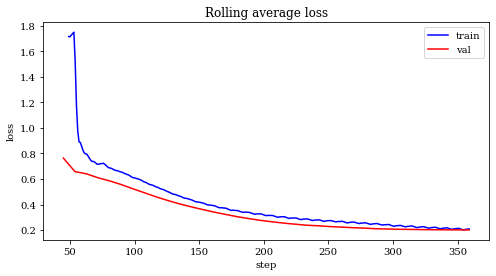

In [18]:
train_gnn(gnn, 100, 150, xTrain1, yTrain1, xValid1, yValid1)

Classification error: 7.692%


7.6923076923076925

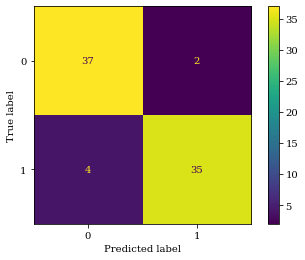

In [19]:
test(gnn, xTest1, yTest1)

Se realizan entonces distintas pruebas variando el número de features de la capa convolucional, la inclusión de vecindarios y la tasa de aprendizaje, de forma tal de intentar reducir el error de clasificación.

=================TRAINING=================
Learning rate: 0.001 Features: 16 K-neighborhood: 2
GNN1Ly(
  (graphConvLy1): GraphConv(in_features = 1, out_features = 16, nb_size = 2, edge_features = 1, graph stored (189 nodes))
  (activationFunction): ReLU()
  (input_fc): Linear(in_features=3024, out_features=256, bias=True)
  (hidden_fc): Linear(in_features=256, out_features=128, bias=True)
  (output_fc): Linear(in_features=128, out_features=2, bias=True)
) 

Epoch:   0, Batch:   0, loss = 0.7076
Epoch:   0, Batch:   5, loss = 13.0333
Validation error: 0.7445
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   1, Batch:   4, loss = 0.6853
Validation error: 0.6960
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   2, Batch:   3, loss = 0.8830
Epoch:   2, Batch:   8, loss = 0.6231
Validation error: 0.6854
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   3, Batch:   2, loss = 0.9250
Epoch:

Epoch:   0, Batch:   5, loss = 107.5441
Validation error: 4.2133
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   1, Batch:   4, loss = 1.3696
Validation error: 0.7817
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   2, Batch:   3, loss = 1.7682
Epoch:   2, Batch:   8, loss = 0.5044
Validation error: 0.6858
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   3, Batch:   2, loss = 0.8697
Epoch:   3, Batch:   7, loss = 0.8911
Validation error: 0.6611
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   4, Batch:   1, loss = 0.8685
Epoch:   4, Batch:   6, loss = 0.5902
Validation error: 0.6571
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   5, Batch:   0, loss = 0.8549
Epoch:   5, Batch:   5, loss = 0.5882
Validation error: 0.6303
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   6, 

Epoch:   4, Batch:   6, loss = 0.3952
Validation error: 0.7257
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   5, Batch:   0, loss = 1.0952
Epoch:   5, Batch:   5, loss = 0.4118
Validation error: 0.6922
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   6, Batch:   4, loss = 0.6752
Validation error: 0.6741
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   7, Batch:   3, loss = 0.8152
Epoch:   7, Batch:   8, loss = 0.5323
Validation error: 0.6649
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   8, Batch:   2, loss = 0.8044
Epoch:   8, Batch:   7, loss = 0.5562
Validation error: 0.6569
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   9, Batch:   1, loss = 0.7744
Epoch:   9, Batch:   6, loss = 0.5906
Validation error: 0.6487
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  10, Ba

Epoch:  29, Batch:   1, loss = 0.2627
Epoch:  29, Batch:   6, loss = 0.3361
Validation error: 0.2486
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  30, Batch:   0, loss = 0.1942
Epoch:  30, Batch:   5, loss = 0.4224
Validation error: 0.2438
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  31, Batch:   4, loss = 0.1530
Validation error: 0.2399
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  32, Batch:   3, loss = 0.1806
Epoch:  32, Batch:   8, loss = 0.2385
Validation error: 0.2357
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  33, Batch:   2, loss = 0.1962
Epoch:  33, Batch:   7, loss = 0.3335
Validation error: 0.2324
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  34, Batch:   1, loss = 0.2227
Epoch:  34, Batch:   6, loss = 0.2998
Validation error: 0.2288
Model saved to ==> C:\Users\amest\Downloads\Git\modu

Epoch:  23, Batch:   2, loss = 0.2794
Epoch:  23, Batch:   7, loss = 0.3446
Validation error: 0.3032
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  24, Batch:   1, loss = 0.4506
Epoch:  24, Batch:   6, loss = 0.4842
Validation error: 0.2743
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  25, Batch:   0, loss = 0.2466
Epoch:  25, Batch:   5, loss = 0.4363
Validation error: 0.2627
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  26, Batch:   4, loss = 0.1974
Validation error: 0.2492
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  27, Batch:   3, loss = 0.2446
Epoch:  27, Batch:   8, loss = 0.2482
Validation error: 0.2372
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  28, Batch:   2, loss = 0.2513
Epoch:  28, Batch:   7, loss = 0.3319
Validation error: 0.2317
Model saved to ==> C:\Users\amest\Downloads\Git\modu

Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   8, Batch:   2, loss = 1.3355
Epoch:   8, Batch:   7, loss = 0.6191
Validation error: 0.5285
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   9, Batch:   1, loss = 0.7613
Epoch:   9, Batch:   6, loss = 1.0865
Validation error: 0.5106
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  10, Batch:   0, loss = 0.6648
Epoch:  10, Batch:   5, loss = 0.5383
Validation error: 0.4528
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  11, Batch:   4, loss = 0.4236
Validation error: 0.4613
Thresh 1/2
Epoch:  12, Batch:   3, loss = 0.5269
Epoch:  12, Batch:   8, loss = 0.4225
Validation error: 0.4225
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  13, Batch:   2, loss = 0.4485
Epoch:  13, Batch:   7, loss = 0.4888
Validation error: 0.4211
Model saved to ==> C:\Users\amest\Downloa

Epoch:  20, Batch:   5, loss = 0.3515
Validation error: 0.4190
Thresh 1/2
Epoch:  21, Batch:   4, loss = 0.3556
Validation error: 0.3688
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  22, Batch:   3, loss = 0.3515
Epoch:  22, Batch:   8, loss = 0.1859
Validation error: 0.4002
Thresh 1/2
Epoch:  23, Batch:   2, loss = 0.4663
Epoch:  23, Batch:   7, loss = 0.4897
Validation error: 0.3887
Thresh 2/2
Early stopping, loading best model.
==================CLASSIFICATION LOSS===================
Learning rate: 0.005 Features: 64 K-neighborhood: 2
Classification error: 11.538%
=================TRAINING=================
Learning rate: 0.01 Features: 64 K-neighborhood: 2
GNN1Ly(
  (graphConvLy1): GraphConv(in_features = 1, out_features = 64, nb_size = 2, edge_features = 1, graph stored (189 nodes))
  (activationFunction): ReLU()
  (input_fc): Linear(in_features=12096, out_features=256, bias=True)
  (hidden_fc): Linear(in_features=256, out_features=128, bias=Tr

Epoch:  23, Batch:   7, loss = 0.3661
Validation error: 0.3545
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  24, Batch:   1, loss = 0.4390
Epoch:  24, Batch:   6, loss = 0.5002
Validation error: 0.3205
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  25, Batch:   0, loss = 0.2614
Epoch:  25, Batch:   5, loss = 0.4688
Validation error: 0.3159
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  26, Batch:   4, loss = 0.2442
Validation error: 0.2936
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  27, Batch:   3, loss = 0.2464
Epoch:  27, Batch:   8, loss = 0.2592
Validation error: 0.2873
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  28, Batch:   2, loss = 0.2747
Epoch:  28, Batch:   7, loss = 0.3705
Validation error: 0.2714
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  29, Ba

C:\Users\amest\AppData\Local\Temp/ipykernel_11272/4172725188.py:70: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,4))


==================CLASSIFICATION LOSS===================
Learning rate: 0.005 Features: 16 K-neighborhood: 3
Classification error: 12.821%
=================TRAINING=================
Learning rate: 0.01 Features: 16 K-neighborhood: 3
GNN1Ly(
  (graphConvLy1): GraphConv(in_features = 1, out_features = 16, nb_size = 3, edge_features = 1, graph stored (189 nodes))
  (activationFunction): ReLU()
  (input_fc): Linear(in_features=3024, out_features=256, bias=True)
  (hidden_fc): Linear(in_features=256, out_features=128, bias=True)
  (output_fc): Linear(in_features=128, out_features=2, bias=True)
) 

Epoch:   0, Batch:   0, loss = 0.9792
Epoch:   0, Batch:   5, loss = 350.7993
Validation error: 2.3889
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   1, Batch:   4, loss = 5.3181
Validation error: 2.4456
Thresh 1/2
Epoch:   2, Batch:   3, loss = 2.7882
Epoch:   2, Batch:   8, loss = 0.4246
Validation error: 1.0882
Model saved to ==> C:\Users\amest\Downloads\Gi

=================TRAINING=================
Learning rate: 0.001 Features: 32 K-neighborhood: 3
GNN1Ly(
  (graphConvLy1): GraphConv(in_features = 1, out_features = 32, nb_size = 3, edge_features = 1, graph stored (189 nodes))
  (activationFunction): ReLU()
  (input_fc): Linear(in_features=6048, out_features=256, bias=True)
  (hidden_fc): Linear(in_features=256, out_features=128, bias=True)
  (output_fc): Linear(in_features=128, out_features=2, bias=True)
) 

Epoch:   0, Batch:   0, loss = 0.5813
Epoch:   0, Batch:   5, loss = 16.8974
Validation error: 0.9464
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   1, Batch:   4, loss = 0.6853
Validation error: 0.6894
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   2, Batch:   3, loss = 0.8664
Epoch:   2, Batch:   8, loss = 0.6109
Validation error: 0.6855
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   3, Batch:   2, loss = 0.8712
Epoch:

Epoch:   3, Batch:   7, loss = 1.3308
Validation error: 0.6450
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   4, Batch:   1, loss = 0.7265
Epoch:   4, Batch:   6, loss = 0.5740
Validation error: 0.6495
Thresh 1/2
Epoch:   5, Batch:   0, loss = 0.8741
Epoch:   5, Batch:   5, loss = 0.5667
Validation error: 0.6258
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   6, Batch:   4, loss = 0.6130
Validation error: 0.5983
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   7, Batch:   3, loss = 0.7168
Epoch:   7, Batch:   8, loss = 0.4202
Validation error: 0.5916
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   8, Batch:   2, loss = 0.7940
Epoch:   8, Batch:   7, loss = 0.6228
Validation error: 0.5459
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   9, Batch:   1, loss = 0.6260
Epoch:   9, Batch:   6, loss = 0.4741
Val

Epoch:  18, Batch:   2, loss = 0.6799
Epoch:  18, Batch:   7, loss = 0.7128
Validation error: 0.6932
Thresh 2/2
Epoch:  19, Batch:   1, loss = 0.6839
Epoch:  19, Batch:   6, loss = 0.7099
Validation error: 0.6932
Thresh 2/2
Epoch:  20, Batch:   0, loss = 0.6852
Epoch:  20, Batch:   5, loss = 0.7060
Validation error: 0.6932
Thresh 2/2
Epoch:  21, Batch:   4, loss = 0.6934
Validation error: 0.6932
Thresh 2/2
Early stopping, loading best model.
==================CLASSIFICATION LOSS===================
Learning rate: 0.01 Features: 32 K-neighborhood: 3
Classification error: 50.000%
=================TRAINING=================
Learning rate: 0.001 Features: 64 K-neighborhood: 3
GNN1Ly(
  (graphConvLy1): GraphConv(in_features = 1, out_features = 64, nb_size = 3, edge_features = 1, graph stored (189 nodes))
  (activationFunction): ReLU()
  (input_fc): Linear(in_features=12096, out_features=256, bias=True)
  (hidden_fc): Linear(in_features=256, out_features=128, bias=True)
  (output_fc): Linear(i

Validation error: 0.1943
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  46, Batch:   4, loss = 0.1052
Validation error: 0.1950
Thresh 1/2
Epoch:  47, Batch:   3, loss = 0.1275
Epoch:  47, Batch:   8, loss = 0.1919
Validation error: 0.1946
Thresh 2/2
Early stopping, loading best model.
==================CLASSIFICATION LOSS===================
Learning rate: 0.001 Features: 64 K-neighborhood: 3
Classification error: 6.410%
=================TRAINING=================
Learning rate: 0.005 Features: 64 K-neighborhood: 3
GNN1Ly(
  (graphConvLy1): GraphConv(in_features = 1, out_features = 64, nb_size = 3, edge_features = 1, graph stored (189 nodes))
  (activationFunction): ReLU()
  (input_fc): Linear(in_features=12096, out_features=256, bias=True)
  (hidden_fc): Linear(in_features=256, out_features=128, bias=True)
  (output_fc): Linear(in_features=128, out_features=2, bias=True)
) 

Epoch:   0, Batch:   0, loss = 0.9557
Epoch:   0, Batch:   5, loss = 472.026

Epoch:   0, Batch:   0, loss = 0.5471
Epoch:   0, Batch:   5, loss = 2484.2232
Validation error: 41.0511
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   1, Batch:   4, loss = 67.6722
Validation error: 4.8858
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   2, Batch:   3, loss = 2.0519
Epoch:   2, Batch:   8, loss = 0.0454
Validation error: 4.5357
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   3, Batch:   2, loss = 9.9251
Epoch:   3, Batch:   7, loss = 1.3422
Validation error: 0.7073
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   4, Batch:   1, loss = 0.7281
Epoch:   4, Batch:   6, loss = 0.7177
Validation error: 0.8829
Thresh 1/2
Epoch:   5, Batch:   0, loss = 1.5337
Epoch:   5, Batch:   5, loss = 1.4895
Validation error: 0.6951
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   6, Batch:   4, loss = 0.701

Epoch:  16, Batch:   4, loss = 0.3666
Validation error: 0.3883
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  17, Batch:   3, loss = 0.3679
Epoch:  17, Batch:   8, loss = 0.3233
Validation error: 0.3608
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  18, Batch:   2, loss = 0.3614
Epoch:  18, Batch:   7, loss = 0.4195
Validation error: 0.3309
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  19, Batch:   1, loss = 0.3692
Epoch:  19, Batch:   6, loss = 0.4155
Validation error: 0.3395
Thresh 1/2
Epoch:  20, Batch:   0, loss = 0.3710
Epoch:  20, Batch:   5, loss = 0.5670
Validation error: 0.2916
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  21, Batch:   4, loss = 0.2266
Validation error: 0.2884
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  22, Batch:   3, loss = 0.2437
Epoch:  22, Batch:   8, loss = 0.2838
Val

Epoch:  25, Batch:   5, loss = 0.3920
Validation error: 0.2220
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  26, Batch:   4, loss = 0.1383
Validation error: 0.2234
Thresh 1/2
Epoch:  27, Batch:   3, loss = 0.1501
Epoch:  27, Batch:   8, loss = 0.2134
Validation error: 0.2207
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  28, Batch:   2, loss = 0.1666
Epoch:  28, Batch:   7, loss = 0.2909
Validation error: 0.2194
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  29, Batch:   1, loss = 0.1822
Epoch:  29, Batch:   6, loss = 0.2448
Validation error: 0.2189
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  30, Batch:   0, loss = 0.1644
Epoch:  30, Batch:   5, loss = 0.3760
Validation error: 0.2167
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  31, Batch:   4, loss = 0.1198
Validation error: 0.2150
Model saved to =

Epoch:  35, Batch:   0, loss = 0.6820
Epoch:  35, Batch:   5, loss = 0.5885
Validation error: 0.5603
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  36, Batch:   4, loss = 0.5483
Validation error: 0.5419
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  37, Batch:   3, loss = 0.6321
Epoch:  37, Batch:   8, loss = 0.4280
Validation error: 0.5304
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  38, Batch:   2, loss = 0.6806
Epoch:  38, Batch:   7, loss = 0.4929
Validation error: 0.5034
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  39, Batch:   1, loss = 0.7285
Epoch:  39, Batch:   6, loss = 0.6073
Validation error: 0.4724
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:  40, Batch:   0, loss = 0.5717
Epoch:  40, Batch:   5, loss = 0.5772
Validation error: 0.5517
Thresh 1/2
Epoch:  41, Batch:   4, loss = 0.4568
Val

Epoch:   6, Batch:   4, loss = 0.6953
Validation error: 3.7037
Thresh 1/2
Epoch:   7, Batch:   3, loss = 1.2398
Epoch:   7, Batch:   8, loss = 0.7208
Validation error: 0.6935
Thresh 2/2
Epoch:   8, Batch:   2, loss = 0.6669
Epoch:   8, Batch:   7, loss = 0.7302
Validation error: 0.6937
Thresh 2/2
Epoch:   9, Batch:   1, loss = 0.6618
Epoch:   9, Batch:   6, loss = 0.7332
Validation error: 0.6937
Thresh 2/2
Epoch:  10, Batch:   0, loss = 0.6601
Epoch:  10, Batch:   5, loss = 0.7308
Validation error: 0.6937
Thresh 2/2
Epoch:  11, Batch:   4, loss = 0.6946
Validation error: 0.6936
Thresh 2/2
Epoch:  12, Batch:   3, loss = 0.6647
Epoch:  12, Batch:   8, loss = 0.7232
Validation error: 0.6935
Thresh 2/2
Epoch:  13, Batch:   2, loss = 0.6675
Epoch:  13, Batch:   7, loss = 0.7224
Validation error: 0.6935
Thresh 2/2
Epoch:  14, Batch:   1, loss = 0.6695
Epoch:  14, Batch:   6, loss = 0.7208
Validation error: 0.6934
Thresh 2/2
Epoch:  15, Batch:   0, loss = 0.6704
Epoch:  15, Batch:   5, loss =

Epoch:   0, Batch:   0, loss = 0.6515
Epoch:   0, Batch:   5, loss = 36.1487
Validation error: 2.2422
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   1, Batch:   4, loss = 0.9146
Validation error: 0.6751
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   2, Batch:   3, loss = 1.5058
Epoch:   2, Batch:   8, loss = 0.4679
Validation error: 0.7223
Thresh 1/2
Epoch:   3, Batch:   2, loss = 0.9740
Epoch:   3, Batch:   7, loss = 1.1589
Validation error: 0.6627
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   4, Batch:   1, loss = 1.1120
Epoch:   4, Batch:   6, loss = 0.7198
Validation error: 0.6528
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   5, Batch:   0, loss = 0.8705
Epoch:   5, Batch:   5, loss = 0.8404
Validation error: 0.6227
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   6, Batch:   4, loss = 0.6059
Va

Validation error: 2.3354
Thresh 2/2
Epoch:   6, Batch:   4, loss = 0.7781
Validation error: 0.6937
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   7, Batch:   3, loss = 0.7156
Epoch:   7, Batch:   8, loss = 0.6795
Validation error: 0.6933
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   8, Batch:   2, loss = 0.7083
Epoch:   8, Batch:   7, loss = 0.6850
Validation error: 0.7574
Thresh 1/2
Epoch:   9, Batch:   1, loss = 0.1352
Epoch:   9, Batch:   6, loss = 5.1161
Validation error: 0.6936
Thresh 2/2
Epoch:  10, Batch:   0, loss = 0.7229
Epoch:  10, Batch:   5, loss = 0.6609
Validation error: 0.6939
Thresh 2/2
Epoch:  11, Batch:   4, loss = 0.6929
Validation error: 0.6940
Thresh 2/2
Epoch:  12, Batch:   3, loss = 0.7349
Epoch:  12, Batch:   8, loss = 0.6553
Validation error: 0.6940
Thresh 2/2
Epoch:  13, Batch:   2, loss = 0.7349
Epoch:  13, Batch:   7, loss = 0.6579
Validation error: 0.6939
Thresh 2/2
Epoch:  14, Ba

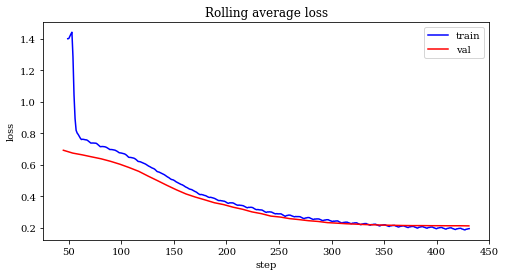

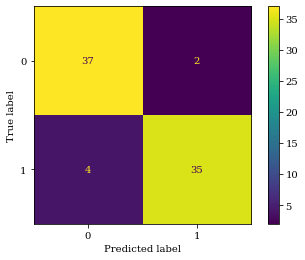

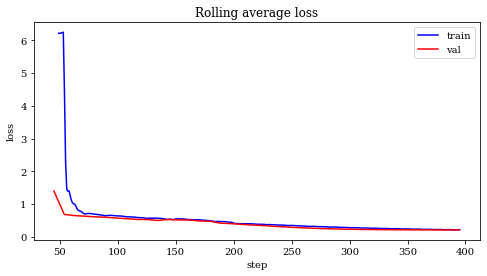

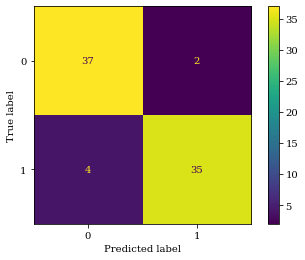

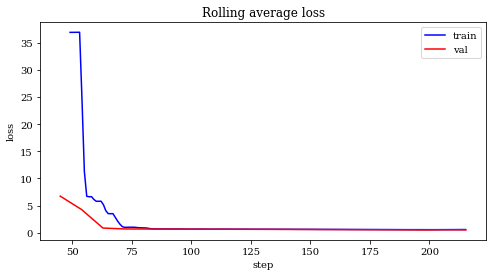

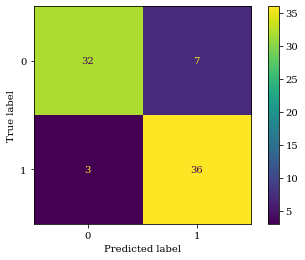

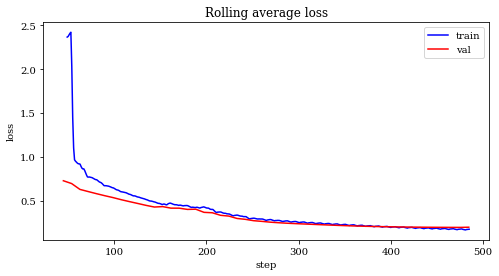

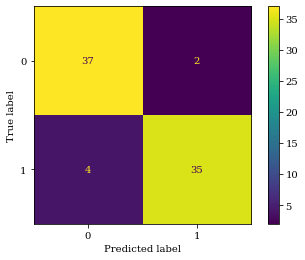

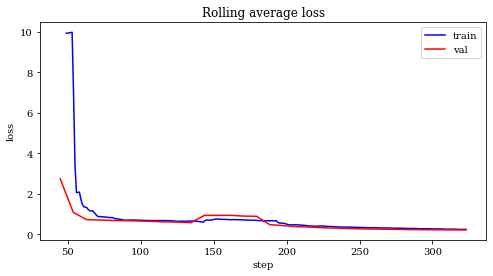

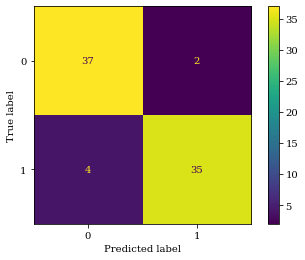

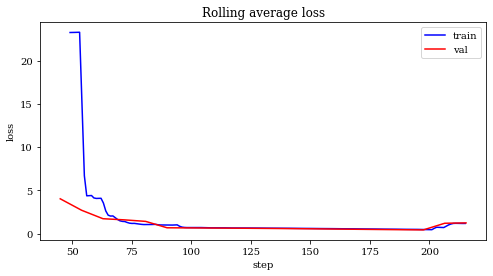

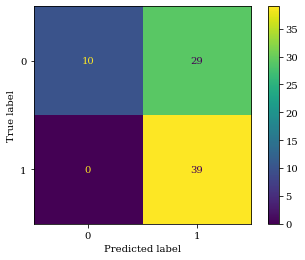

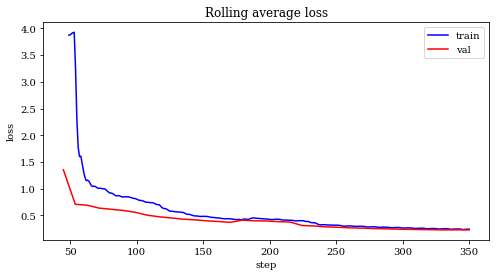

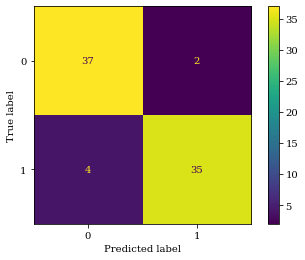

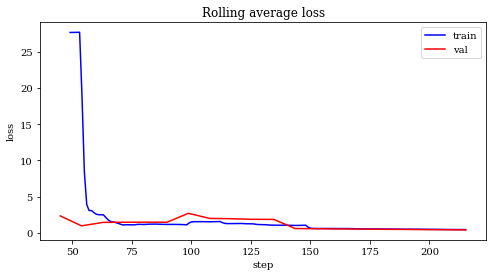

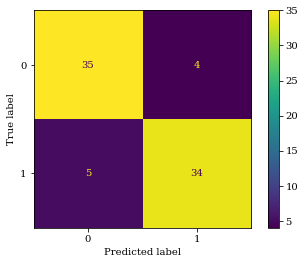

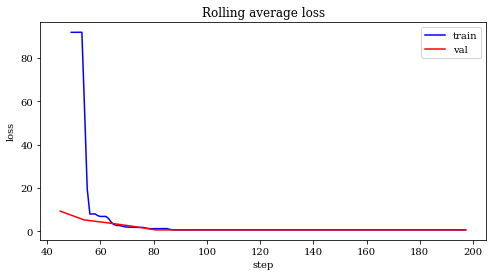

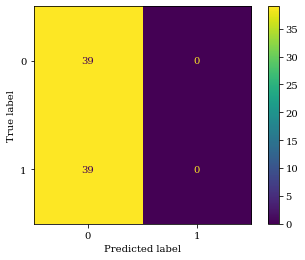

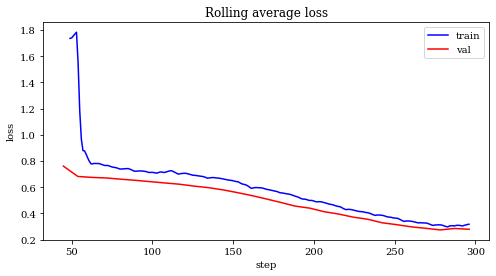

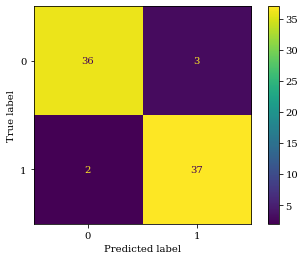

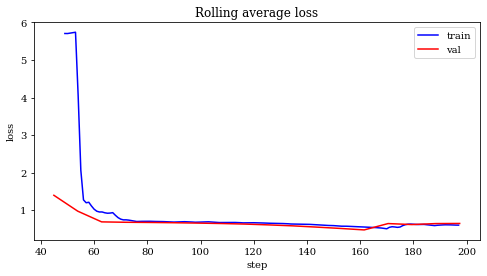

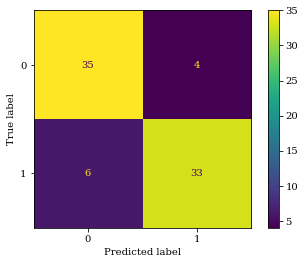

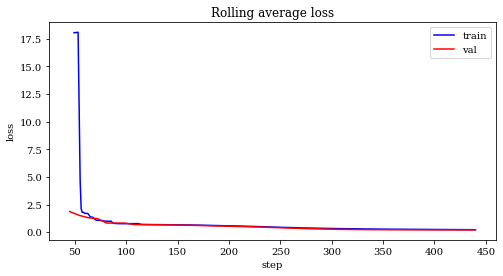

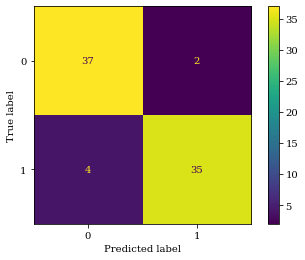

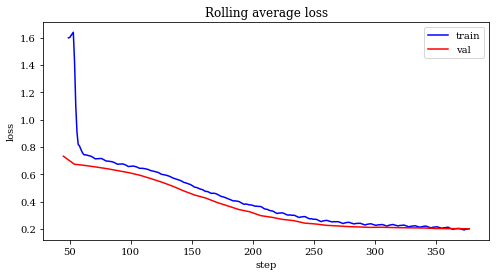

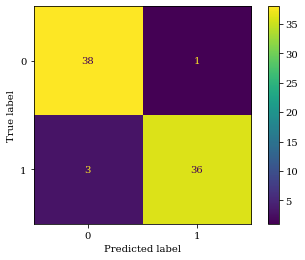

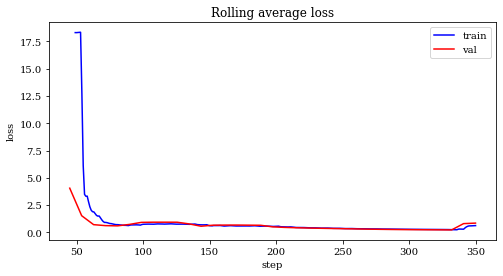

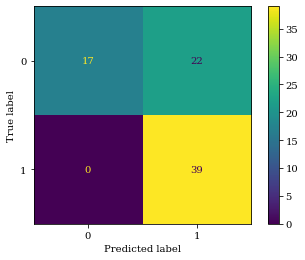

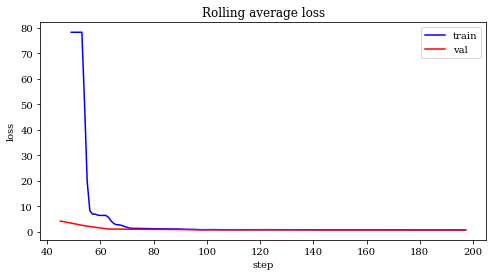

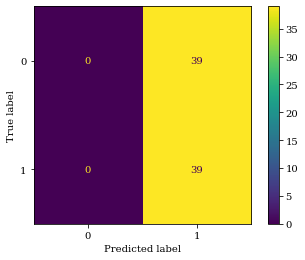

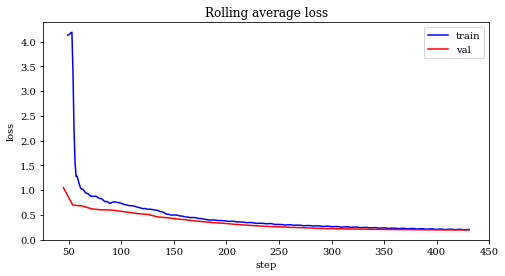

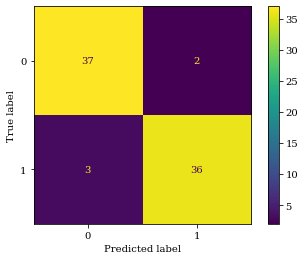

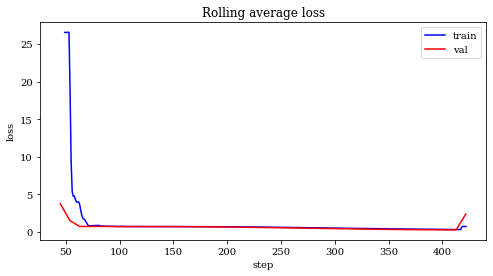

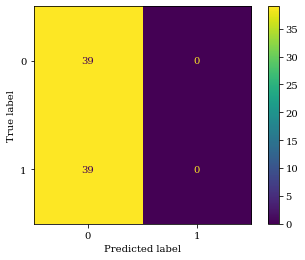

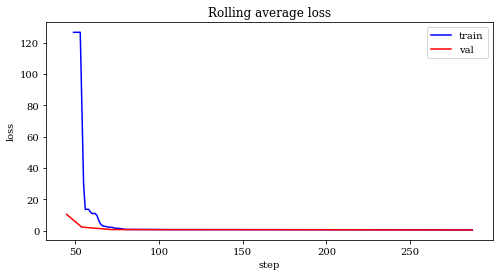

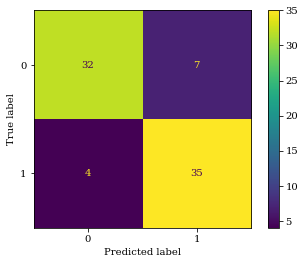

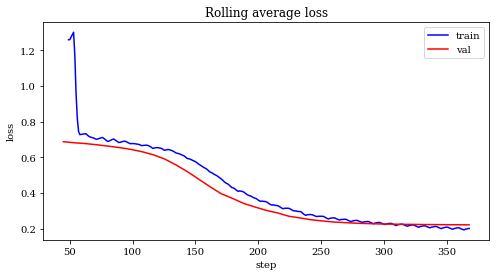

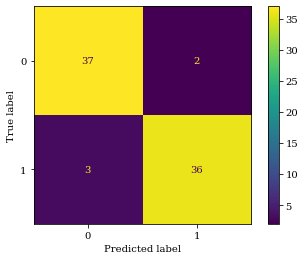

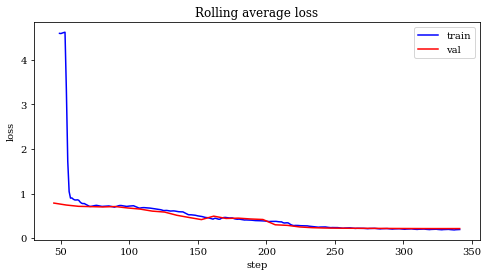

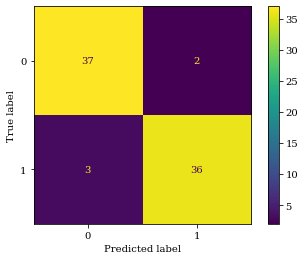

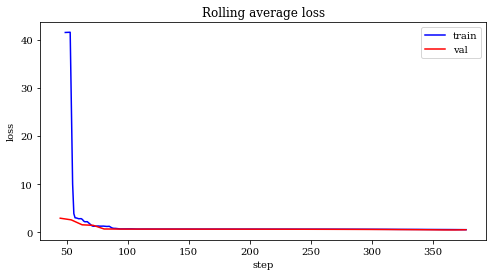

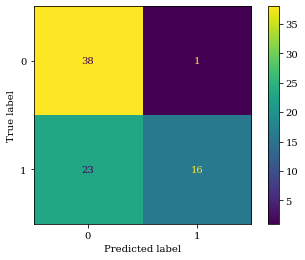

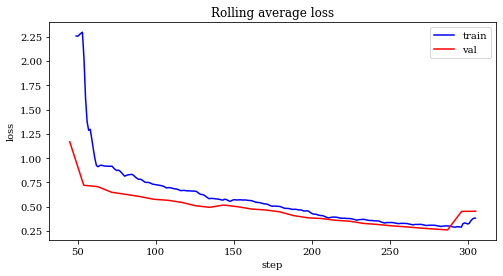

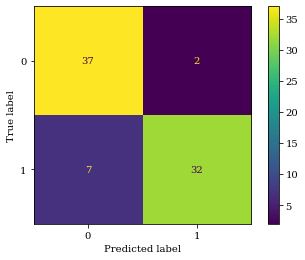

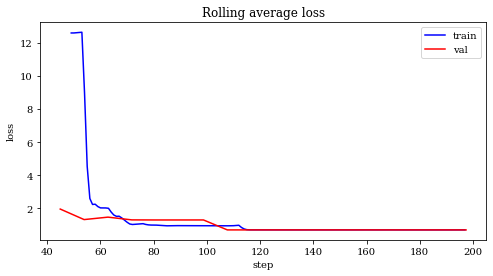

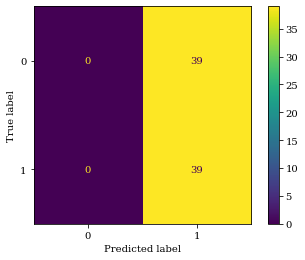

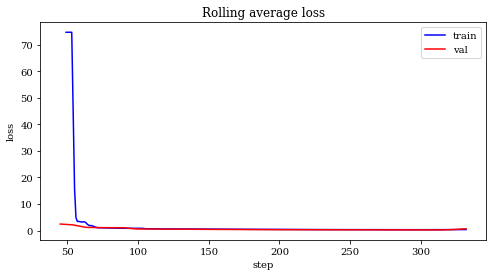

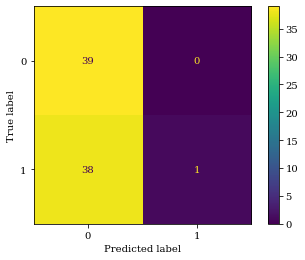

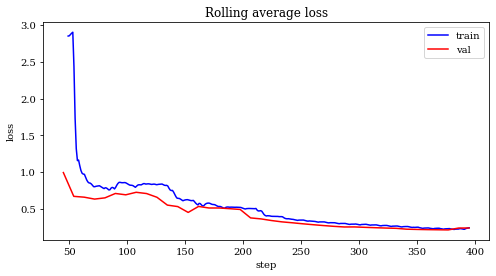

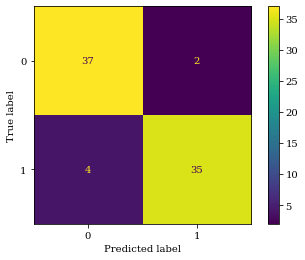

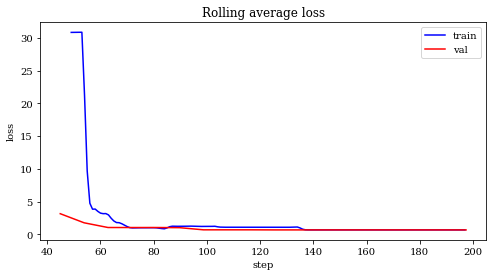

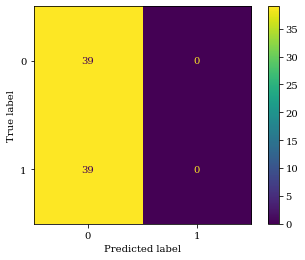

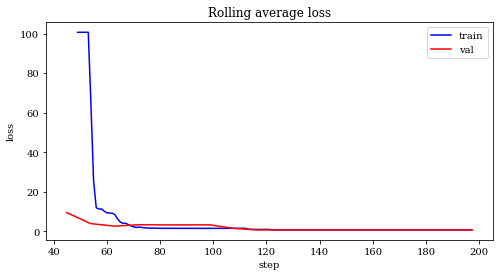

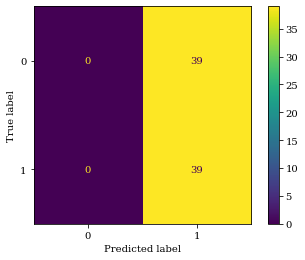

In [20]:
nEpochs = 100 
batchSize = 150
learningRate = [0.001, 0.005, 0.01]
lossFunction = nn.CrossEntropyLoss()
F = [16,32,64]
K = [2,3,4]
error = []
comb = []
for k in K:
    for f in F:
        for l in learningRate:
            model_reset(gnn)
            gnn = GNN1Ly(f, k, S1 ) # Don't forget to add the graph
            optimizer = torch.optim.Adam(gnn.parameters(), lr = l)
            print('=================TRAINING=================')
            print('Learning rate: {} Features: {} K-neighborhood: {}'.format(l, f, k))
            print(gnn,'\n')
            train_gnn(gnn, nEpochs, batchSize, xTrain1, yTrain1, xValid1, yValid1)
            print('==================CLASSIFICATION LOSS===================')
            print('Learning rate: {} Features: {} K-neighborhood: {}'.format(l, f, k))
            class_err = test(gnn, xTest1, yTest1)
            comb.append([l,f,k])
            error.append(class_err)

Se crea un dataframe con los resultados obtenidos para cada combinación y se buscan las alternativas con el menor error de validación.

In [21]:
data = pd.DataFrame(list(zip(comb, error)),
               columns =['Combinación', 'Pérdida de validación %'])
data

,Combinación,Pérdida de validación %
0,"[0.001, 16, 2]",7.692308
1,"[0.005, 16, 2]",7.692308
2,"[0.01, 16, 2]",12.820513
3,"[0.001, 32, 2]",7.692308
4,"[0.005, 32, 2]",7.692308
5,"[0.01, 32, 2]",37.179487
6,"[0.001, 64, 2]",7.692308
7,"[0.005, 64, 2]",11.538462
8,"[0.01, 64, 2]",50.000000
9,"[0.001, 16, 3]",6.410256


In [22]:
data[data['Pérdida de validación %']==data['Pérdida de validación %'].min()]

,Combinación,Pérdida de validación %
12,"[0.001, 32, 3]",5.128205


Con estos parámetros óptimos se entrena nuevamente una red de una sola capa.

In [35]:
F = 32 
K = 3 
S1 = torch.tensor(S1) 

model_reset(gnn)
gnn = GNN1Ly(F, K, S1 ) 

nEpochs = 500 
batchSize = 150 
learningRate = 0.001 
lossFunction = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(gnn.parameters(), lr = learningRate)

C:\Users\amest\AppData\Local\Temp/ipykernel_11272/4188045793.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  S1 = torch.tensor(S1)


Epoch:   0, Batch:   0, loss = 0.7145
Epoch:   0, Batch:   5, loss = 29.0572
Validation error: 5.7739
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   1, Batch:   4, loss = 2.1959
Validation error: 0.7039
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   2, Batch:   3, loss = 0.3171
Epoch:   2, Batch:   8, loss = 0.3217
Validation error: 1.1206
Thresh 1/2
Epoch:   3, Batch:   2, loss = 2.5066
Epoch:   3, Batch:   7, loss = 0.7963
Validation error: 0.6654
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   4, Batch:   1, loss = 0.7483
Epoch:   4, Batch:   6, loss = 1.2270
Validation error: 0.6628
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   5, Batch:   0, loss = 0.8584
Epoch:   5, Batch:   5, loss = 0.5245
Validation error: 0.6654
Thresh 1/2
Epoch:   6, Batch:   4, loss = 0.6328
Validation error: 0.6228
Model saved to ==> C:\Users\amest\Download

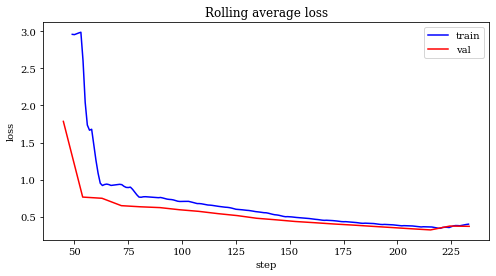

In [36]:
train_gnn(gnn, nEpochs, batchSize, xTrain1, yTrain1, xValid1, yValid1)

Classification error: 7.692%


7.6923076923076925

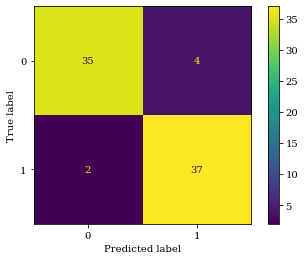

In [38]:
test(gnn, xTest1, yTest1)

Si bien no se observaron problemas de overfitting por la implementación del early-stopping durante el entrenamiento, se opta por agregar el dropout a la arquitectura inicial para evitar la posible aparición del problema.

In [39]:
# We start with a 2-layer GNN
class GNN1Lycorr(nn.Module):
    
    def __init__(self, F, K, S):
        # F: Number of features (hidden units) at the output of the first layer
        # K1: Number of K-hops to consider in the first layer
        # S: Graph matrix description
        
        # Initialize the parent
        super().__init__()
        
        self.name = 'gnn1ly'

        # First layer
        self.graphConvLy1 = gml.GraphConv(1, F, K) # The first '1' is because the input feature is 1
        self.graphConvLy1.set_graph(S) # Set the graph we're going to use
        # Nonlinear activation function
        self.activationFunction = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        
        # Readout layer
                
        self.input_fc = nn.Linear(F * S.shape[1], 256)
        self.hidden_fc = nn.Linear(256, 128)
        self.output_fc = nn.Linear(128, 2)
        #self.readoutLayer = nn.Linear(F * S.shape[1], 2)
        #    Note that at the end of the second layer we have N = S.shape[1] nodes, each one with F2 features
        #    Therefore, we want to flatten all of this into a single vector to pass it to the readout layer
        #    The output of the readout layer is the number of classes (or it could be just 1, depending on
        #    what function we're going to use to train this)
    
    def forward(self, x):
        
        # Remember the signal has shape B x Fin x N, where Fin = 1 for us
        
        # Apply the first layer
        y = self.graphConvLy1(x) # Output has shape B x F1 x N
        y = self.activationFunction(y) # Nonlinear activation
        y = self.dropout(y)
        
        
        # Flatten the output before moving to apply the readout layer
        y = y.reshape(y.shape[0], y.shape[1]*y.shape[2])
        
        # Apply the readout layer
        #y = self.readoutLayer(y)
        y = self.input_fc(y)
        y = self.activationFunction(y)
        y = self.dropout(y)
        y = self.hidden_fc(y)
        y = self.activationFunction(y)
        y = self.dropout(y)
        y = self.output_fc(y)
        
        return y

In [40]:
F = 32 
K = 3 
S1 = torch.tensor(S1) 

model_reset(gnn)
gnn = GNN1Lycorr(F, K, S1 )

nEpochs = 500 
batchSize = 150 
learningRate = 0.001 
lossFunction = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(gnn.parameters(), lr = learningRate)

C:\Users\amest\AppData\Local\Temp/ipykernel_11272/3890743402.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  S1 = torch.tensor(S1)


Epoch:   0, Batch:   0, loss = 0.6330
Epoch:   0, Batch:   5, loss = 31.4181
Validation error: 0.7503
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   1, Batch:   4, loss = 0.8004
Validation error: 0.7109
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   2, Batch:   3, loss = 1.1160
Epoch:   2, Batch:   8, loss = 0.6225
Validation error: 0.6897
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   3, Batch:   2, loss = 0.7624
Epoch:   3, Batch:   7, loss = 0.7054
Validation error: 0.6905
Thresh 1/2
Epoch:   4, Batch:   1, loss = 0.7105
Epoch:   4, Batch:   6, loss = 0.6928
Validation error: 0.6888
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn1ly.pt
Epoch:   5, Batch:   0, loss = 0.7141
Epoch:   5, Batch:   5, loss = 0.6785
Validation error: 0.6901
Thresh 1/2
Epoch:   6, Batch:   4, loss = 0.6891
Validation error: 0.6837
Model saved to ==> C:\Users\amest\Download

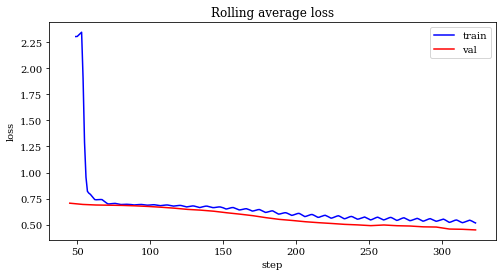

In [41]:
train_gnn(gnn, nEpochs, batchSize, xTrain1, yTrain1, xValid1, yValid1)

Classification error: 11.538%


11.538461538461538

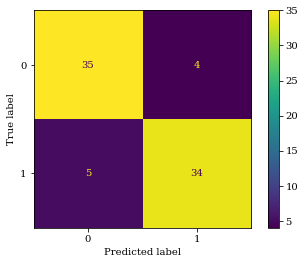

In [42]:
test(gnn, xTest1, yTest1)

La efectividad obtenida luego de diversas corridas es ligeramente menor al caso sin dropout.

# *Ejercicio 3*

De acuerdo con lo indicado, se crea una GNN de dos capas, un perceptrón multicapa y una CNN con la cantidad de features y los parámetros óptimos obtenidos en el ejercicio 2. Para todos los casos, se conserva la capa de dropout a fines de garantizar evitar el overfitting, si bien se observó que con el early-stopping implementado en el entrenamiento no se obtuvieron problemas de este tipo.

In [93]:
# We start with a 2-layer GNN
class GNN2Ly(nn.Module):
    
    def __init__(self, F, K, S):
        # F1: Number of features (hidden units) at the output of the first layer
        # F2: Number of features (hidden units) at the output of the second layer
        # K1: Number of K-hops to consider in the first layer
        # K2: Number of K-hops to consider in the second layer
        # S: Graph matrix description
        
        # Initialize the parent
        super().__init__()
        
        self.name = 'gnn'
        self.S = S
        
        # First layer
        self.graphConvLy1 = gml.GraphConv(1, F, K) # The first '1' is because the input feature is 1
        self.graphConvLy1.set_graph(S) # Set the graph we're going to use
        self.dropout = nn.Dropout(p=0.5)
        # Nonlinear activation function
        self.activationFunction = nn.ReLU()
        
        # Second layer
        self.graphConvLy2 = gml.GraphConv(F, 2*F, K) # F1 input features from previous layer
        self.graphConvLy2.set_graph(S) # Set the graph we're going to use
        
        # Readout layer
        self.input_fc = nn.Linear(2 * F * S.shape[1], 256)
        self.hidden_fc = nn.Linear(256, 128)
        self.output_fc = nn.Linear(128, 2)        #    Note that at the end of the second layer we have N = S.shape[1] nodes, each one with F2 features
        #    Therefore, we want to flatten all of this into a single vector to pass it to the readout layer
        #    The output of the readout layer is the number of classes (or it could be just 1, depending on
        #    what function we're going to use to train this)
    
    def set_graph(self,mat):
        self._S = mat
    
    def forward(self, x):
        
        # Remember the signal has shape B x Fin x N, where Fin = 1 for us
        
        # Apply the first layer
        y = self.graphConvLy1(x) # Output has shape B x F1 x N
        y = self.activationFunction(y) # Nonlinear activation
        y = self.dropout(y)
        
        # Apply the second layer
        y = self.graphConvLy2(y) # Output has shape B x F2 x N
        y = self.activationFunction(y) # Nonlinear activation
        y = self.dropout(y)

        # Flatten the output before moving to apply the readout layer
        y = y.reshape(y.shape[0], y.shape[1]*y.shape[2])
        
        # Apply the readout layer
        y = self.input_fc(y)
        y = self.activationFunction(y)
        y = self.dropout(y)
        y = self.hidden_fc(y)
        y = self.activationFunction(y)
        y = self.dropout(y)
        y = self.output_fc(y)        
        return y

In [94]:
class MLP(nn.Module):
    def __init__(self, F, S):
        super().__init__()
        
        self.name = 'mlp'
        self.S = S

        self.input_fc = nn.Linear(S.shape[1], F)
        self.hidden_fc = nn.Linear(F, 2*F)
        self.dropout = nn.Dropout(p=0.5)
        self.output_fc = nn.Linear(2*F, 2)
    
    def set_graph(self,mat):
        self._S = mat
    
    def forward(self, x):
        
        #x = [batch size, height, width]
        
        x = x.reshape(x.shape[0], x.shape[1]*x.shape[2])

        
        #x = [batch size, height * width]
        
        h_1 = nn.functional.relu(self.input_fc(x))
        
        #h_1 = [batch size, 250]
        h_1 = self.dropout(h_1)

        h_2 = nn.functional.relu(self.hidden_fc(h_1))

        #h_2 = [batch size, 100]
        h_2 = self.dropout(h_2)


        y_pred = self.output_fc(h_2)
        
        #y_pred = [batch size, output dim]
        y_pred.squeeze()
        
        return y_pred

In [95]:
class CNN(nn.Module):
    def __init__(self, F, S):
        super().__init__()
        
        self.name = 'cnn'
        self.S = S
        
        self.conv1 = nn.Conv1d(1, F, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(F, 2*F, kernel_size=3, stride=1, padding=1)
        self.dropout = nn.Dropout(p=0.5)
        self.fc1 = nn.Linear(2*F * S.shape[1], 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 2)
    
    def set_graph(self,mat):
        self._S = mat
        
    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = self.dropout(x)
        x = nn.functional.relu(self.conv2(x))
        x = self.dropout(x)
        x = x.reshape(x.shape[0], x.shape[1]*x.shape[2])
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = nn.functional.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


Se entrenan todas las redes para comparar el desempeño, usando siempre como parámetro las 32 features obtenidas en el apartado anterior. Se utiliza también la tasa de aprendizaje de 0.001, el tamaño de batch de 150 y unas 500 épocas de entrenamiento. Para el testeo se prueban tanto los parámetros de entrenamiento de corte como los almacenados para el caso del mínimo error de validación (best).

In [96]:
gnn = GNN2Ly(32, 3, S1)
gnn_best = GNN2Ly(32, 3, S1)
model_reset(gnn)
learningRate = 0.001 # Learning rate for an ADAM optimizer
lossFunction = nn.CrossEntropyLoss() # Loss function to use
optimizer = torch.optim.Adam(gnn.parameters(), lr = learningRate)

Epoch:   0, Batch:   0, loss = 0.6033
Epoch:   0, Batch:   5, loss = 24.2814
Validation error: 0.6875
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn.pt
Epoch:   1, Batch:   4, loss = 0.7313
Validation error: 0.6890
Thresh 1/2
Epoch:   2, Batch:   3, loss = 0.8247
Epoch:   2, Batch:   8, loss = 0.6277
Validation error: 0.6909
Thresh 2/2
Epoch:   3, Batch:   2, loss = 0.7714
Epoch:   3, Batch:   7, loss = 0.6568
Validation error: 0.6924
Thresh 2/2
Epoch:   4, Batch:   1, loss = 0.7224
Epoch:   4, Batch:   6, loss = 0.6699
Validation error: 0.6929
Thresh 2/2
Epoch:   5, Batch:   0, loss = 0.7154
Epoch:   5, Batch:   5, loss = 0.6828
Validation error: 0.6931
Thresh 2/2
Epoch:   6, Batch:   4, loss = 0.6909
Validation error: 0.6930
Thresh 2/2
Epoch:   7, Batch:   3, loss = 0.6968
Epoch:   7, Batch:   8, loss = 0.6757
Validation error: 0.6930
Thresh 2/2
Epoch:   8, Batch:   2, loss = 0.7092
Epoch:   8, Batch:   7, loss = 0.6762
Validation error: 0.6919
Thresh 2/2
Epoch

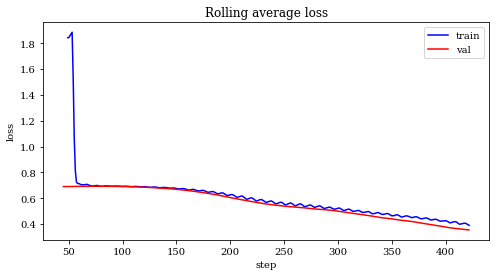

In [97]:
train_gnn(gnn, 500, 150, xTrain1, yTrain1, xValid1, yValid1)

Model loaded from <== C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn.pt
Classification error: 7.692%
Classification error: 6.410%


6.41025641025641

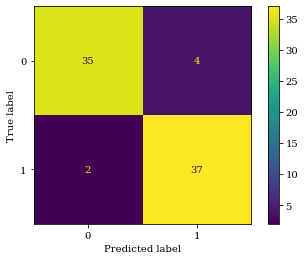

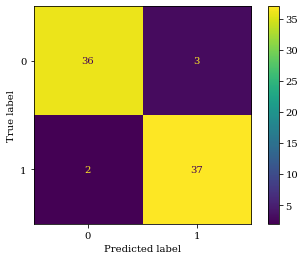

In [98]:
load_checkpoint(r'C:\Users\amest\Downloads\Git\modulo-3-gnn' + '/modelgnn.pt', gnn_best, optimizer)
test(gnn, xTest1, yTest1)
test(gnn_best, xTest1, yTest1)

In [99]:
mlp = MLP(32,S1)
mlp_best = MLP(32,S1)
model_reset(mlp)
learningRate = 0.001 # Learning rate for an ADAM optimizer
lossFunction = nn.CrossEntropyLoss() # Loss function to use
optimizer = torch.optim.Adam(mlp.parameters(), lr = learningRate)

Epoch:   0, Batch:   0, loss = 1.3453
Epoch:   0, Batch:   5, loss = 2.2573
Validation error: 0.8004
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelmlp.pt
Epoch:   1, Batch:   4, loss = 0.7669
Validation error: 0.6308
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelmlp.pt
Epoch:   2, Batch:   3, loss = 0.6990
Epoch:   2, Batch:   8, loss = 0.6085
Validation error: 0.6123
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelmlp.pt
Epoch:   3, Batch:   2, loss = 0.7408
Epoch:   3, Batch:   7, loss = 0.5717
Validation error: 0.5794
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelmlp.pt
Epoch:   4, Batch:   1, loss = 0.6990
Epoch:   4, Batch:   6, loss = 0.6082
Validation error: 0.5444
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelmlp.pt
Epoch:   5, Batch:   0, loss = 0.5724
Epoch:   5, Batch:   5, loss = 0.6759
Validation error: 0.5114
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelm

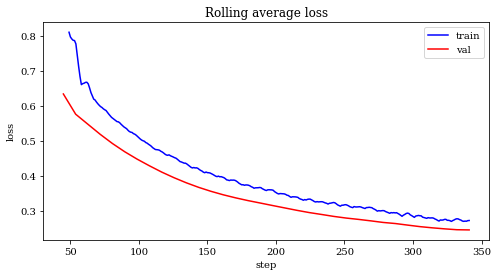

In [100]:
train_gnn(mlp, 500, 150, xTrain1, yTrain1, xValid1, yValid1)

Model loaded from <== C:\Users\amest\Downloads\Git\modulo-3-gnn/modelmlp.pt
Classification error: 6.410%
Classification error: 6.410%


6.41025641025641

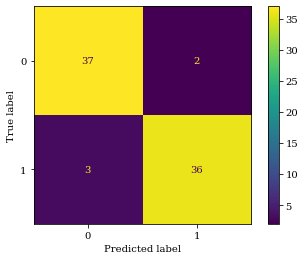

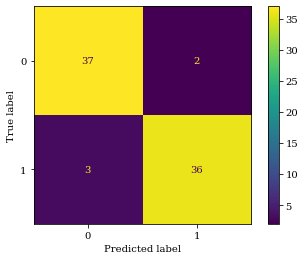

In [101]:
load_checkpoint(r'C:\Users\amest\Downloads\Git\modulo-3-gnn' + '/modelmlp.pt', mlp_best, optimizer)
test(mlp, xTest1, yTest1)
test(mlp_best, xTest1, yTest1)

In [102]:
cnn = CNN(32,S1)
cnn_best = CNN(32,S1)
model_reset(cnn)
learningRate = 0.001 # Learning rate for an ADAM optimizer
lossFunction = nn.CrossEntropyLoss() # Loss function to use
optimizer = torch.optim.Adam(cnn.parameters(), lr = learningRate)

Epoch:   0, Batch:   0, loss = 0.8095
Epoch:   0, Batch:   5, loss = 22.2383
Validation error: 0.7220
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelcnn.pt
Epoch:   1, Batch:   4, loss = 0.6784
Validation error: 0.6957
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelcnn.pt
Epoch:   2, Batch:   3, loss = 0.8865
Epoch:   2, Batch:   8, loss = 0.6532
Validation error: 0.6935
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelcnn.pt
Epoch:   3, Batch:   2, loss = 0.7731
Epoch:   3, Batch:   7, loss = 0.6798
Validation error: 0.6905
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelcnn.pt
Epoch:   4, Batch:   1, loss = 0.7490
Epoch:   4, Batch:   6, loss = 0.6671
Validation error: 0.6881
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelcnn.pt
Epoch:   5, Batch:   0, loss = 0.7305
Epoch:   5, Batch:   5, loss = 0.6567
Validation error: 0.6853
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/model

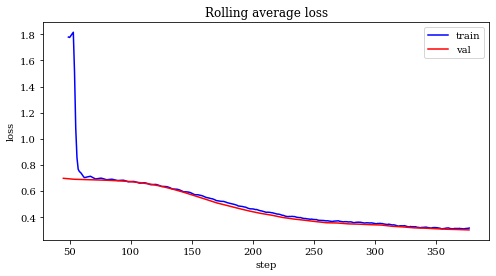

In [103]:
train_gnn(cnn, 500, 150, xTrain1, yTrain1, xValid1, yValid1)

Model loaded from <== C:\Users\amest\Downloads\Git\modulo-3-gnn/modelcnn.pt
Classification error: 7.692%
Classification error: 7.692%


7.6923076923076925

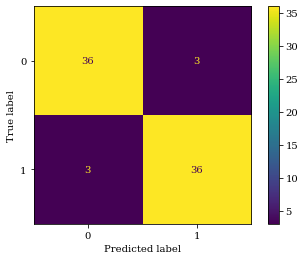

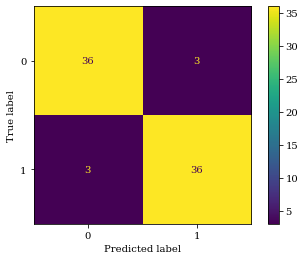

In [104]:
load_checkpoint(r'C:\Users\amest\Downloads\Git\modulo-3-gnn' + '/modelcnn.pt', cnn_best, optimizer)
test(cnn, xTest1, yTest1)
test(cnn_best, xTest1, yTest1)

El mejor desempeño se obtuvo con la GNN y el MLP. Es necesario considerar también que el tiempo de entrenamiento para el MLP es considerablemente menor que para la GNN y CNN, y sin embargo su efectividad en la clasificación fue similar en estas condiciones.

Para comprobar que sucede al permutar las señales, se aplicó una matriz de permutación aleatoria al vector de señal es de testeo y la misma también a la matriz de adyacencia.

In [105]:
P = np.eye(S1.shape[1])
P = shuffle(P, random_state=1)

In [106]:
S1 = dataAusten.getGraph() # Get the adjacency matrix
N1 = S1.shape[0] # Get the number of nodes
xTrain1, yTrain1 = dataAusten.getSamples('train') # Get the training samples
xValid1, yValid1 = dataAusten.getSamples('valid') # Get the validation samples
xTest1, yTest1 = dataAusten.getSamples('test') # Get the test samples
nTrain1 = xTrain1.shape[0] # Number of training samples
nValid1 = xValid1.shape[0] # Number of validation samples
nTest1 = xTest1.shape[0] # Number of testing samples

# Normalize the adjacency matrix
S1 = S1/np.max(np.linalg.eigvals(S1))

S = S1.dot(P)

xTrain1 = xTrain1.dot(P)
xValid1 = xValid1.dot(P)
xTest1 = xTest1.dot(P)

# Add the extra "edge_feature" dimension to the matrix
S = np.expand_dims(S, axis = 0) # 1 x N x N

# Note that the xTrain, xValid and xTest are of shape B x N, 
# but we want them to be B x F x N with F = 1 (there's only one input feature)
xTrain1 = np.expand_dims(xTrain1, axis = 1)
xValid1 = np.expand_dims(xValid1, axis = 1)
xTest1 = np.expand_dims(xTest1, axis = 1)
S = torch.tensor(S)

In [107]:
gnn_best.set_graph(S)
mlp_best.set_graph(S)
cnn_best.set_graph(S)

GNN:
Classification error: 48.718%

MLP:
Classification error: 50.000%

CNN:
Classification error: 48.718%


48.717948717948715

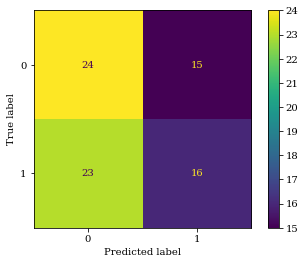

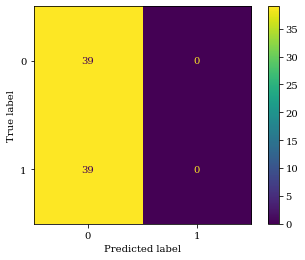

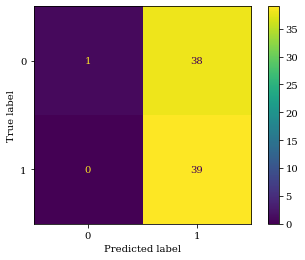

In [108]:
print('GNN:')
test(gnn_best, xTest1, yTest1)
print('\nMLP:')
test(mlp_best, xTest1, yTest1)
print('\nCNN:')
test(cnn_best, xTest1, yTest1)

El resultado obtenido es tal como si las redes no hubieran sido entrenadas, ya que la permutación altera los vínculos entre los nodos si no preserva correctamente la orientación entre ellos.

Si se procede ahora a entrenar las redes nuevamente con la matriz y las señales permutadas, el resultado obtenido es nuevamente una clasificación binaria efectiva.

In [109]:
gnn = GNN2Ly(32, 3, S)
gnn_best = GNN2Ly(32, 3, S)

Epoch:   0, Batch:   0, loss = 0.8266
Epoch:   0, Batch:   5, loss = 8.7952
Validation error: 0.6955
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn.pt
Epoch:   1, Batch:   4, loss = 0.6961
Validation error: 0.6930
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn.pt
Epoch:   2, Batch:   3, loss = 0.7524
Epoch:   2, Batch:   8, loss = 0.6424
Validation error: 0.6927
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn.pt
Epoch:   3, Batch:   2, loss = 0.7502
Epoch:   3, Batch:   7, loss = 0.6596
Validation error: 0.6925
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn.pt
Epoch:   4, Batch:   1, loss = 0.7272
Epoch:   4, Batch:   6, loss = 0.6698
Validation error: 0.6916
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn.pt
Epoch:   5, Batch:   0, loss = 0.7206
Epoch:   5, Batch:   5, loss = 0.6731
Validation error: 0.6909
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelg

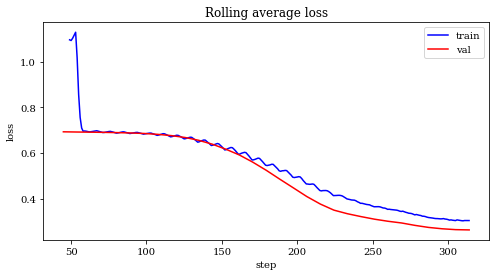

In [110]:
learningRate = 0.001 # Learning rate for an ADAM optimizer
lossFunction = nn.CrossEntropyLoss() # Loss function to use
optimizer = torch.optim.Adam(gnn.parameters(), lr = learningRate)
train_gnn(gnn, 500, 150, xTrain1, yTrain1, xValid1, yValid1)

Model loaded from <== C:\Users\amest\Downloads\Git\modulo-3-gnn/modelgnn.pt
Classification error: 5.128%
Classification error: 3.846%


3.8461538461538463

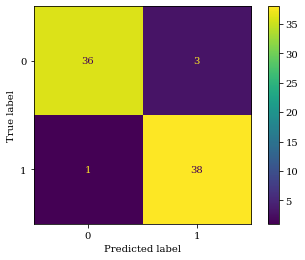

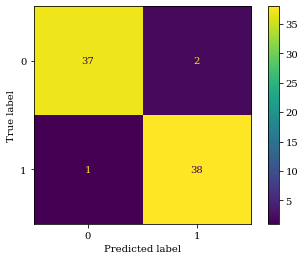

In [111]:
load_checkpoint(r'C:\Users\amest\Downloads\Git\modulo-3-gnn' + '/modelgnn.pt', gnn_best, optimizer)
test(gnn, xTest1, yTest1)
test(gnn_best, xTest1, yTest1)

In [112]:
mlp = MLP(32,S)
mlp_best = MLP(32,S)

Epoch:   0, Batch:   0, loss = 0.4953
Epoch:   0, Batch:   5, loss = 2.9308
Validation error: 0.8511
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelmlp.pt
Epoch:   1, Batch:   4, loss = 0.8285
Validation error: 0.6582
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelmlp.pt
Epoch:   2, Batch:   3, loss = 0.6695
Epoch:   2, Batch:   8, loss = 0.6424
Validation error: 0.6288
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelmlp.pt
Epoch:   3, Batch:   2, loss = 0.7151
Epoch:   3, Batch:   7, loss = 0.6103
Validation error: 0.6082
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelmlp.pt
Epoch:   4, Batch:   1, loss = 0.6965
Epoch:   4, Batch:   6, loss = 0.6404
Validation error: 0.5800
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelmlp.pt
Epoch:   5, Batch:   0, loss = 0.6305
Epoch:   5, Batch:   5, loss = 0.6691
Validation error: 0.5441
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelm

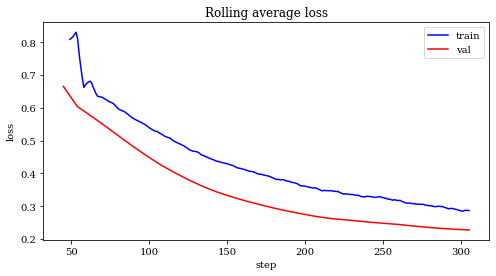

In [113]:
learningRate = 0.001 # Learning rate for an ADAM optimizer
lossFunction = nn.CrossEntropyLoss() # Loss function to use
optimizer = torch.optim.Adam(mlp.parameters(), lr = learningRate)
train_gnn(mlp, 500, 150, xTrain1, yTrain1, xValid1, yValid1)

Model loaded from <== C:\Users\amest\Downloads\Git\modulo-3-gnn/modelmlp.pt
Classification error: 5.128%
Classification error: 5.128%


5.128205128205128

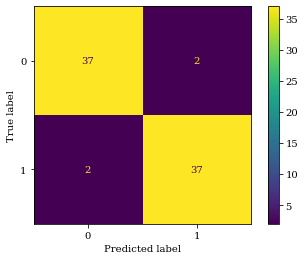

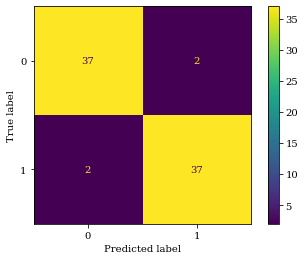

In [114]:
load_checkpoint(r'C:\Users\amest\Downloads\Git\modulo-3-gnn' + '/modelmlp.pt', mlp_best, optimizer)
test(mlp, xTest1, yTest1)
test(mlp_best, xTest1, yTest1)

In [115]:
cnn = CNN(32,S)
cnn_best = CNN(32,S)

Epoch:   0, Batch:   0, loss = 0.9080
Epoch:   0, Batch:   5, loss = 22.6311
Validation error: 0.7117
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelcnn.pt
Epoch:   1, Batch:   4, loss = 0.8097
Validation error: 0.6887
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelcnn.pt
Epoch:   2, Batch:   3, loss = 0.8215
Epoch:   2, Batch:   8, loss = 0.7680
Validation error: 0.6918
Thresh 1/2
Epoch:   3, Batch:   2, loss = 0.7448
Epoch:   3, Batch:   7, loss = 0.7006
Validation error: 0.6902
Thresh 2/2
Epoch:   4, Batch:   1, loss = 0.7649
Epoch:   4, Batch:   6, loss = 0.6863
Validation error: 0.6895
Thresh 2/2
Epoch:   5, Batch:   0, loss = 0.7245
Epoch:   5, Batch:   5, loss = 0.6730
Validation error: 0.6884
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelcnn.pt
Epoch:   6, Batch:   4, loss = 0.6858
Validation error: 0.6857
Model saved to ==> C:\Users\amest\Downloads\Git\modulo-3-gnn/modelcnn.pt
Epoch:   7, Batch:   3, loss = 0.6990
Epoch

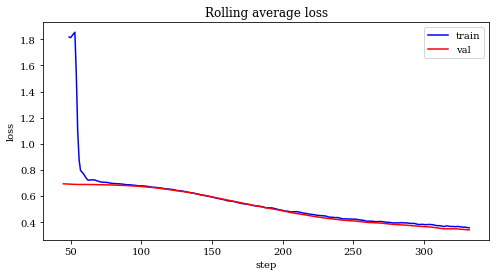

In [116]:
learningRate = 0.001 # Learning rate for an ADAM optimizer
lossFunction = nn.CrossEntropyLoss() # Loss function to use
optimizer = torch.optim.Adam(cnn.parameters(), lr = learningRate)
train_gnn(cnn, 500, 150, xTrain1, yTrain1, xValid1, yValid1)

Model loaded from <== C:\Users\amest\Downloads\Git\modulo-3-gnn/modelcnn.pt
Classification error: 6.410%
Classification error: 6.410%


6.41025641025641

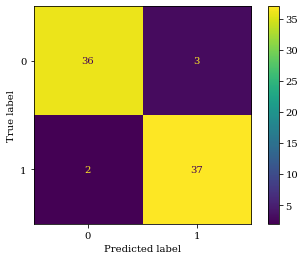

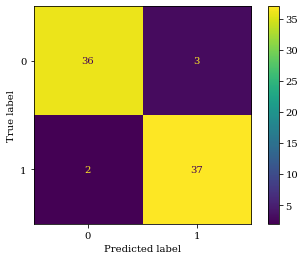

In [117]:
load_checkpoint(r'C:\Users\amest\Downloads\Git\modulo-3-gnn' + '/modelcnn.pt', cnn_best, optimizer)
test(cnn, xTest1, yTest1)
test(cnn_best, xTest1, yTest1)

En este caso, el menor error de clasificación se obtuvo con la GNN, seguida del MLP. Como conclusión, vistos los resultados, la estructura del grafo no tiene una influencia decisiva en el proceso de clasificación que le dé una ventaja sustancial a la implementación de una GNN en este caso. Sin embargo, es posible que el uso para aplicaciones en las que la estructura y los vínculos entre nodos sea esencial y determinante, o no se pueda ingresar las señales en forma estructurada que sea adaptable a los otros tipos de redes, la implementación de la GNN sea más efectiva.